In [1]:
import pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sas
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs ,init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
%matplotlib inline
sas.set()


In [2]:
kiva_loans = pd.read_csv('H:/PYTHON/python for data science/s11-project/kiva/kiva_loans.csv')
kiva_mpi_region_locations = pd.read_csv('H:/PYTHON/python for data science/s11-project/kiva/kiva_mpi_region_locations.csv')
loan_theme_ids = pd.read_csv('H:/PYTHON/python for data science/s11-project/kiva/loan_theme_ids.csv')
loan_themes_by_region = pd.read_csv('H:/PYTHON/python for data science/s11-project/kiva/loan_themes_by_region.csv')

In [3]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
kiva_loans.shape

(671205, 20)

In [5]:
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [6]:
kiva_loans.sample(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
519956,1180234,250.0,250.0,General Store,Retail,to buy additional stocks of groceries to sell.,PH,Philippines,"Isabela, Negros Occidental",PHP,145.0,2016-11-04 08:34:10+00:00,2016-10-21 07:00:00+00:00,2016-11-14 03:11:19+00:00,8.0,3,NaN,female,irregular,2016-11-04
582878,1244294,600.0,600.0,Food Production/Sales,Food,to purchase corn to sell tortillas.,SV,El Salvador,Ciudad El Triunfo,USD,199.0,2017-02-22 21:39:16+00:00,2017-01-30 08:00:00+00:00,2017-03-09 02:26:21+00:00,15.0,15,#Woman Owned Biz,female,monthly,2017-02-22
473473,1133820,100.0,100.0,Farming,Agriculture,to purchase improved farm inputs that will inc...,NG,Nigeria,Kaduna,NGN,288.0,2016-08-16 11:27:07+00:00,2016-07-26 07:00:00+00:00,2016-08-25 23:32:59+00:00,19.0,4,"#Vegan, #Supporting Family",male,bullet,2016-08-16
560431,1221369,525.0,525.0,Farming,Agriculture,to buy sacks of fertilizer and seeds for his farm,PH,Philippines,"Casingsingan Norte, Amulung, Cagayan",PHP,123.0,2017-01-17 07:17:05+00:00,2016-12-23 08:00:00+00:00,2017-01-17 19:46:30+00:00,8.0,13,"#Elderly, user_favorite",male,bullet,2017-01-17
456359,1116151,550.0,550.0,Computers,Services,to buy a printer .,PH,Philippines,Misamis Occidental,PHP,136.0,2016-07-14 07:17:09+00:00,2016-07-05 07:00:00+00:00,2016-07-29 21:32:23+00:00,13.0,21,"#Repeat Borrower, user_favorite, user_favorite...",female,monthly,2016-07-14
171263,819521,5875.0,5875.0,Livestock,Agriculture,to help Ka Laug Ta Yar Community’s 30 villager...,MM,Myanmar (Burma),Kungyangon,MMK,416.0,2014-12-23 03:48:36+00:00,2014-12-23 08:00:00+00:00,2015-01-02 12:35:14+00:00,14.0,171,"user_favorite, user_favorite, user_favorite, u...",female,bullet,2014-12-23
230638,878526,175.0,175.0,Pigs,Agriculture,to buy feed and other supplies to raise her pigs.,PH,Philippines,"Calatrava, Negros Occidental",PHP,145.0,2015-04-30 06:53:48+00:00,2015-04-29 07:00:00+00:00,2015-05-05 13:41:28+00:00,8.0,7,NaN,female,irregular,2015-04-30
360097,1006858,625.0,625.0,Agriculture,Agriculture,to buy cost efficient maize seeds and fertiliz...,KE,Kenya,Webuye,KES,202.0,2016-01-12 07:26:18+00:00,2016-02-01 08:00:00+00:00,2016-02-09 20:21:23+00:00,11.0,14,"#Sustainable Ag, #Vegan, #Elderly, #Parent, #T...","female, male, male, female, female, female, ma...",bullet,2016-01-12
352648,999210,425.0,425.0,Food Production/Sales,Food,to purchase more kilos of meat and spices for ...,PH,Philippines,"Plaridel-Puntod Lopez Jaena,Misamis Occidental",PHP,126.0,2015-12-23 02:56:42+00:00,2015-11-30 08:00:00+00:00,2016-01-22 19:16:52+00:00,12.0,16,#Interesting Photo,male,monthly,2015-12-23
548444,1208597,900.0,900.0,Higher education costs,Education,to pay for her children's school fee.,VN,Vietnam,01 Công Liêm,VND,121.0,2016-12-22 01:32:50+00:00,2016-11-25 08:00:00+00:00,2016-12-26 05:43:49+00:00,17.0,18,"#Schooling, user_favorite",female,monthly,2016-12-22


---
## ASK
---

__1.What is the total numbers of borrowers?__


__2.What is the total numbers of agent loan?__

__3.What is the total numbers of borrowers loan?__

__4.What is the most common sector has took loans?__

__5.What is the top 10 has largest amount of loans?__

__6.How many activity we have and what is the most common?__

__7.What is the most reason the people took loans for?__

__8.Is there particlur sector takeing large amount of loans?__

__9.What is the largest countries that took loans?__

__10.What is the most region that took loans?__

__11.What is the most country has large number of region?__

__12.Is there country has particlur sector that took loans for it?__

__13.What is the important currency that people treating by it?__

__14.What is the large amount of loan for each year ?__

__15.What is the commen day that people took loans in it ?__

__16.Is there particlur time in Year people took loans increasinly?__

__17.Is there relationship betewen big amount of loan and time's return it?__

__18.Who is the most gender has took loans?__

__19.What is the mostly repayment interval?__

__20.Which is rapidest gender repayment interval male or female?__

__21.What is the total partner kive has it?__

__22.What is the total number of partener we have?__

__23.Who is the top 10 partener has took loans?__

__24.What is the numbers of loan theme types?__

__25.Is there particlur theme type took larg amount of loans?__

__26.What is the avarge of multidimensional poverty in world region?__

__27.What is the largest and lowest region has multidimensional poverty?__

__28.What is the largest and lowest country has multidimensional poverty?__

__29.Is the multidimensional poverty related by takeing loans or not?__

__30.Is the sector of partner affecets on amount of loans or not?__

__31.What is the total of loans which people took?__

__32.What is the amount of loan for each world region ?__

__33.What is the amount of MPI for each world region ?__


__34.What is the category of people which took lonas?__

__35.Which sector gender took the loans for?__

__37.greater person that took loans aloan ?__

---
## prepration

---

In [7]:
loan_theme_ids.shape

(779092, 4)

In [8]:
import pandas_profiling


In [9]:
# pandas_profiling.ProfileReport(kiva_loans)

In [10]:
loan_themes_by_region

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15731,539,"N/A, direct to Sevamob",DSE Direct,a10500000081IYl,Health,South Africa,No,Nkangala,NaN,ZAF,...,50000,"Nkangala, South Africa","[(-25.9459898, 29.6035495)]",Nkangala; Mpumalanga; South Africa,"(-25.9459898, 29.6035495)",-25.945990,29.603549,ZAF,NaN,NaN
15732,540,"N/A, direct to Sanergy",DSE Direct,a10500000081HIw,Water and Sanitation,Kenya,No,Nairobi,"(-1.2833333, 36.8166667)",KEN,...,50000,"Nairobi, Kenya","[(-1.2920659, 36.8219462)]",Nairobi; Nairobi County; Kenya,"(-1.2920659, 36.8219462)",-1.292066,36.821946,"Nairobi, Kenya","(-1.2920659, 36.8219462)",NaN
15733,542,N/A direct to BioLite Inc.,DSE Direct,a1050000008AQrj,Clean Cookstove,Uganda,No,Kampala,"(0.3155556, 32.5655556)",UGA,...,50000,"Kampala, Uganda","[(0.3475964, 32.5825197)]",Kampala; Kampala; Central Region; Uganda,"(0.3475964, 32.5825197)",0.347596,32.582520,"Kampala, Uganda","(0.3475964, 32.5825197)",NaN
15734,543,N/A direct to LegWorks Inc.,DSE Direct,a1050000008AQwt,Health,Canada,No,Toronto,NaN,CAN,...,50000,"Toronto, Canada","[(43.653226, -79.3831843)]",Toronto; Toronto Division; Ontario; Canada,"(43.653226, -79.3831843)",43.653226,-79.383184,CAN,NaN,NaN


In [11]:
loan_theme_ids

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0
...,...,...,...,...
779087,1444237,a1050000000wf0h,General,136.0
779088,1444238,a1050000000wf0h,General,136.0
779089,1444240,a1050000000wf0h,General,136.0
779090,1444241,a1050000000wf22,General,245.0


---
## Preprocessing and Cleaning
---

In [12]:
kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


In [13]:
kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [14]:
kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [15]:
kiva_loans.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [16]:
kiva_loans.use=kiva_loans.use.fillna('Other')

In [17]:
kiva_loans.region=kiva_loans.region.fillna('Unknown')

In [18]:
kiva_loans.partner_id=kiva_loans.partner_id.fillna(0)

In [19]:
kiva_loans.tags=kiva_loans.tags.fillna('No tags')

In [20]:
kiva_loans.borrower_genders.sample(20)

585378                                               female
115750                                                 male
261220                                                 male
66771                                                female
587541                                               female
25418                                                female
34813     female, female, female, female, female, female...
459500                                               female
447174                                               female
294719                                               female
222948                                                 male
442954                                               female
125191                                               female
546659    female, female, female, female, female, female...
566612                                               female
20143                                                female
632998                                  

In [21]:
kiva_loans.borrower_genders=kiva_loans.borrower_genders.str.split(',').str[0]

In [22]:
kiva_loans.borrower_genders = kiva_loans.borrower_genders.fillna('Other')

In [23]:
kiva_loans.isna().sum()


id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                       0
country_code              8
country                   0
region                    0
currency                  0
partner_id                0
posted_time               0
disbursed_time         2396
funded_time           48331
term_in_months            0
lender_count              0
tags                      0
borrower_genders          0
repayment_interval        0
date                      0
dtype: int64

In [24]:
kiva_loans.borrower_genders.value_counts()

female    513643
male      153341
Other       4221
Name: borrower_genders, dtype: int64

In [25]:
kiva_loans=kiva_loans.astype({'posted_time':np.datetime64,
'disbursed_time':np.datetime64,
'funded_time':np.datetime64,
'date':np.datetime64 ,
'tags':'string' , 
'borrower_genders':'string' ,
'id':'string',
'partner_id':'string',
'use':'string'})

In [26]:
kiva_loans.dtypes

id                            string
funded_amount                float64
loan_amount                  float64
activity                      object
sector                        object
use                           string
country_code                  object
country                       object
region                        object
currency                      object
partner_id                    string
posted_time           datetime64[ns]
disbursed_time        datetime64[ns]
funded_time           datetime64[ns]
term_in_months               float64
lender_count                   int64
tags                          string
borrower_genders              string
repayment_interval            object
date                  datetime64[ns]
dtype: object

In [27]:
kiva_loans=kiva_loans.convert_dtypes()

In [28]:
kiva_loans['posted_date'] = kiva_loans.posted_time.astype('string').str.split(" ").str[0]	

kiva_loans['posted_time'] = kiva_loans.posted_time.astype('string').str.split(" ").str[1]	

In [29]:
kiva_loans['disbursed_date'] = kiva_loans.disbursed_time.astype('string').str.split(" ").str[0]	

kiva_loans['disbursed_time'] = kiva_loans.disbursed_time.astype('string').str.split(" ").str[1]	

In [30]:
kiva_loans.nunique()

id                    671205
funded_amount            610
loan_amount              479
activity                 163
sector                    15
use                   424913
country_code              86
country                   87
region                 12696
currency                  67
partner_id               367
posted_time            85751
disbursed_time          3829
funded_time           498007
term_in_months           148
lender_count             503
tags                   86720
borrower_genders           3
repayment_interval         4
date                    1298
posted_date             1298
disbursed_date          1364
dtype: int64

In [31]:
kiva_loans.id.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
671200    False
671201    False
671202    False
671203    False
671204    False
Name: id, Length: 671205, dtype: bool

In [32]:
kiva_loans.use = kiva_loans.use.str.replace('[','').str.replace(']','').str.replace(',','').str.replace("'",'').str.replace(".",'').str.replace("-",'').str.replace(":",'').str.replace("(",'').str.replace(")",'')

C:\Users\bhr\AppData\Local\Temp\ipykernel_4204\484922436.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [33]:
kiva_loans.use.sample(10)

349549                      to rebuild her old family house
380987    to buy costefficient maize seeds and fertilize...
45764                 to buy feed and vitamins for her pigs
602413       to pay for her studies in manicure and makeup 
293195    to buy heads of piglets and purchase bags of a...
471481    to purchase improved farm inputs that will inc...
582100    to pay for more fabric thread needles and othe...
508986      to purchase natural fertilizer for growing rice
252506    invest in a larger volume of shoes to meet cus...
643393                         to cover the thesis expenses
Name: use, dtype: string

In [34]:
kiva_loans.region = kiva_loans.region.str.replace('[','').str.replace(']','').str.replace(',','').str.replace("'",'').str.replace(".",'').str.replace("-",'').str.replace(":",'').str.replace("(",'').str.replace(")",'')

C:\Users\bhr\AppData\Local\Temp\ipykernel_4204\2103139114.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [35]:
kiva_loans.region.sample(10)

85638                                    Unknown
60858     Kandal province Kandal Stoeng district
81030                                 Faisalabad
280925                     El Aguila de Pejibaye
403767                                    Kisumu
579526                                     Yavan
611696                        Paucartambo  Cusco
294303                                   Unknown
49502                               Sanniquellie
495255                                    Limuru
Name: region, dtype: string

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

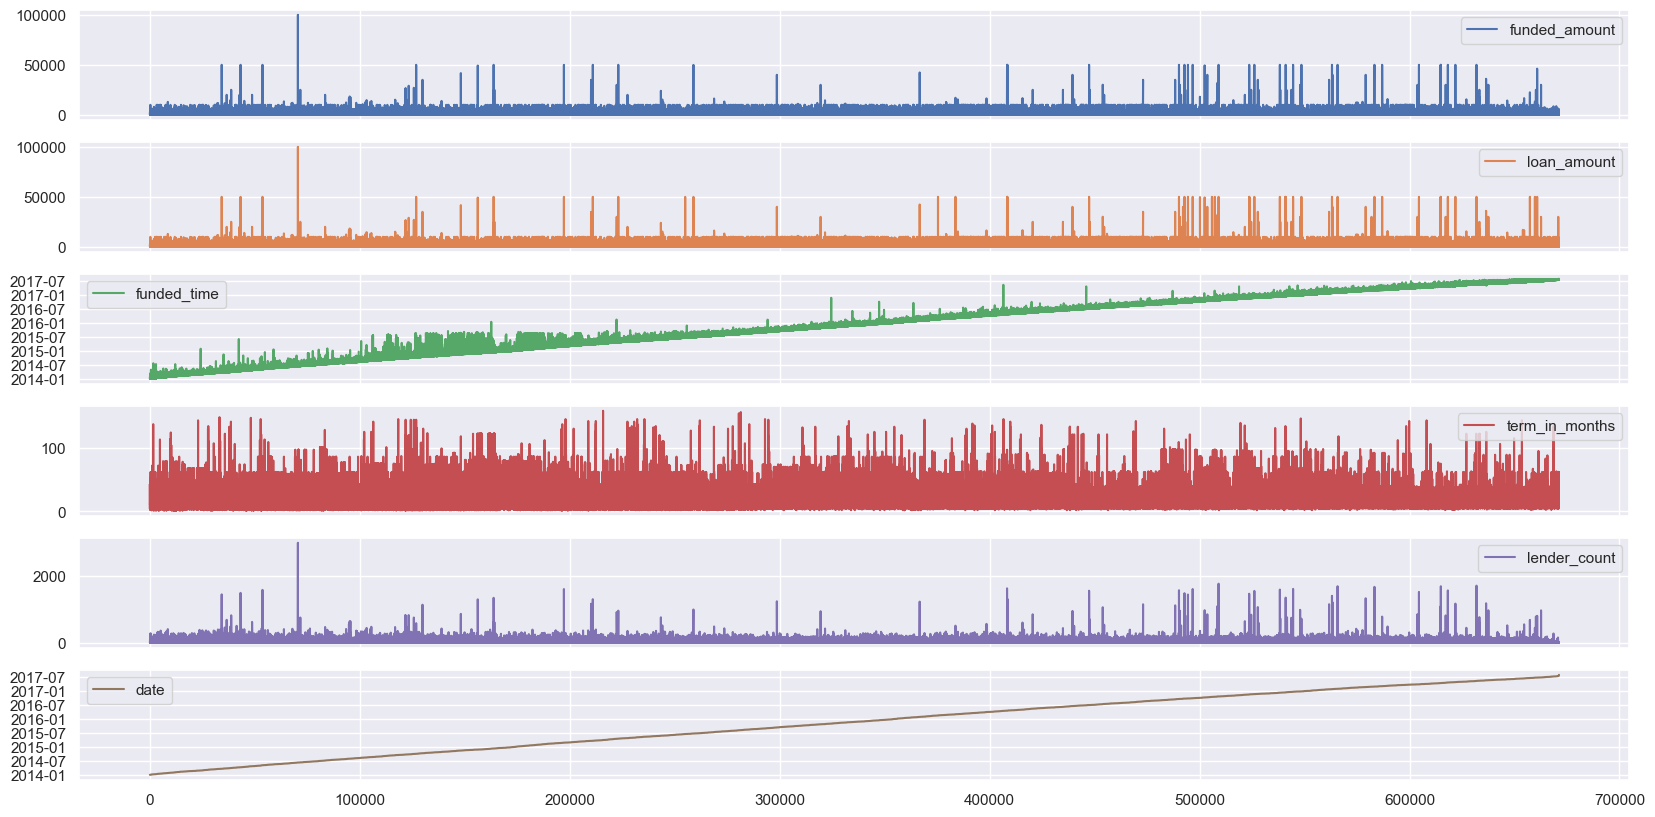

In [36]:
kiva_loans.plot(subplots=True , figsize=(20,10))

In [37]:
kiva_loans.loc[kiva_loans.funded_amount.argmax(),['funded_amount']] = round(kiva_loans['funded_amount'].mean())

In [38]:
kiva_loans.loc[kiva_loans.loan_amount.argmax(),['loan_amount']] = round(kiva_loans['loan_amount'].mean())

In [39]:
kiva_mpi_region_locations.isna().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

In [40]:
kiva_mpi_region_locations[kiva_mpi_region_locations.LocationName.isna()].sample(10)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
2094,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1704,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1638,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1668,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1892,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2631,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2597,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2496,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
1597,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN


In [41]:
kiva_mpi_region_locations.dropna(subset='LocationName',inplace=True)

In [42]:
kiva_mpi_region_locations = kiva_mpi_region_locations.convert_dtypes()

In [43]:
kiva_mpi_region_locations.world_region=kiva_mpi_region_locations.world_region.str.replace("-",' ')

In [44]:
loan_theme_ids.isna().sum()

id                     0
Loan Theme ID      14813
Loan Theme Type    14813
Partner ID         14813
dtype: int64

In [45]:
loan_theme_ids[loan_theme_ids['Loan Theme ID'].isna()].sample(10)

,id,Loan Theme ID,Loan Theme Type,Partner ID
427278,1086466,NaN,NaN,NaN
429208,1088396,NaN,NaN,NaN
426203,1085391,NaN,NaN,NaN
431849,1091037,NaN,NaN,NaN
428221,1087409,NaN,NaN,NaN
425727,1084915,NaN,NaN,NaN
501012,1160537,NaN,NaN,NaN
422003,1081191,NaN,NaN,NaN
428582,1087770,NaN,NaN,NaN
421638,1080826,NaN,NaN,NaN


In [46]:
loan_theme_ids.dropna(subset=['Loan Theme ID'] , inplace=True)

In [47]:
loan_theme_ids=loan_theme_ids.convert_dtypes()

In [48]:
loan_theme_ids.duplicated().sum()

0

In [49]:
loan_theme_ids.columns = loan_theme_ids.columns.str.replace(" ", "_" )

In [50]:
loan_theme_ids

,id,Loan_Theme_ID,Loan_Theme_Type,Partner_ID
0,638631,a1050000000skGl,General,151
1,640322,a1050000000skGl,General,151
2,641006,a1050000002X1ij,Higher Education,160
3,641019,a1050000002X1ij,Higher Education,160
4,641594,a1050000002VbsW,Subsistence Agriculture,336
...,...,...,...,...
779087,1444237,a1050000000wf0h,General,136
779088,1444238,a1050000000wf0h,General,136
779089,1444240,a1050000000wf0h,General,136
779090,1444241,a1050000000wf22,General,245


In [51]:
loan_themes_by_region.isna().sum()

Partner ID                0
Field Partner Name        0
sector                    0
Loan Theme ID             0
Loan Theme Type           0
country                   0
forkiva                   0
region                    0
geocode_old           14536
ISO                      14
number                    0
amount                    0
LocationName              0
geocode                2074
names                  2075
geo                       0
lat                    2074
lon                    2074
mpi_region               14
mpi_geo                6065
rural_pct              1392
dtype: int64

In [52]:
loan_themes_by_region[loan_themes_by_region.geocode_old.isna()].sample()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
1533,77,Al Majmoua,General Financial Inclusion,a1050000006Tq58,Vulnerable Women,Lebanon,No,Qana,NaN,LBN,...,2500,"Qana, Lebanon","[(33.2083135, 35.3002132)]",Qana; Tyre; South Governorate; Lebanon,"(33.2083135, 35.3002132)",33.208314,35.300213,LBN,NaN,43.0


In [53]:
loan_themes_by_region.geocode_old = loan_themes_by_region.geocode_old.fillna(value=0)

In [54]:
loan_themes_by_region[loan_themes_by_region.names.isna()]

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
35,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Soung Province,0,KHM,...,4325,"Soung Province, Cambodia",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,KHM,NaN,90.0
53,15,South Pacific Business Development (SPBD) - Samoa,General Financial Inclusion,a1050000002YAcr,Underserved,Samoa,No,Aele-Fou,0,WSM,...,21800,"Aele-Fou, Samoa",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,WSM,NaN,90.0
54,15,South Pacific Business Development (SPBD) - Samoa,General Financial Inclusion,a1050000002Y8pD,Seasonal Worker,Samoa,No,Aele-Fou,0,WSM,...,600,"Aele-Fou, Samoa",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,WSM,NaN,90.0
63,15,South Pacific Business Development (SPBD) - Samoa,General Financial Inclusion,a1050000002YAcr,Underserved,Samoa,No,Alamutu E,0,WSM,...,2250,"Alamutu E, Samoa",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,WSM,NaN,90.0
64,15,South Pacific Business Development (SPBD) - Samoa,General Financial Inclusion,a1050000002YAcr,Underserved,Samoa,No,Alamutu,0,WSM,...,13525,"Alamutu, Samoa",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,WSM,NaN,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15715,533,MEC APROVAG,Agriculture,a1050000008HMXp,Agriculture,Senegal,No,Sankagne,0,SEN,...,25225,"Sankagne, Senegal",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,SEN,NaN,80.0
15721,538,iDE Ghana,Water and Sanitation,a10500000080haV,Sanitation,Ghana,No,Gumo,0,GHA,...,475,"Gumo, Ghana",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,GHA,NaN,NaN
15722,538,iDE Ghana,Water and Sanitation,a10500000080haV,Sanitation,Ghana,No,Jisonaayili,0,GHA,...,475,"Jisonaayili, Ghana",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,GHA,NaN,NaN
15724,538,iDE Ghana,Water and Sanitation,a10500000080haV,Sanitation,Ghana,No,Katariga,0,GHA,...,600,"Katariga, Ghana",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,GHA,NaN,NaN


In [55]:
loan_themes_by_region.names = loan_themes_by_region.names.fillna(value='Other')

In [56]:
loan_themes_by_region.geocode = loan_themes_by_region.geocode.fillna(value=0)

In [57]:
loan_themes_by_region.lat = loan_themes_by_region.lat.fillna(0)

In [58]:
loan_themes_by_region.lon = loan_themes_by_region.lon.fillna(0)

In [59]:
loan_themes_by_region.mpi_geo = loan_themes_by_region.mpi_geo.fillna(0)

In [60]:
loan_themes_by_region.rural_pct = loan_themes_by_region.rural_pct.fillna(0)

In [61]:
loan_themes_by_region.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [62]:
loan_themes_by_region = loan_themes_by_region.rename(columns={'Partner ID':'Partner_ID' , 'Field Partner Name':'Field_Partner_Name','Loan Theme ID':'Loan_Theme_ID','Loan Theme Type':'Loan_Theme_Type'})

In [63]:
loan_themes_by_region.columns

Index(['Partner_ID', 'Field_Partner_Name', 'sector', 'Loan_Theme_ID',
       'Loan_Theme_Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [64]:
loan_themes_by_region.dtypes

Partner_ID              int64
Field_Partner_Name     object
sector                 object
Loan_Theme_ID          object
Loan_Theme_Type        object
country                object
forkiva                object
region                 object
geocode_old            object
ISO                    object
number                  int64
amount                  int64
LocationName           object
geocode                object
names                  object
geo                    object
lat                   float64
lon                   float64
mpi_region             object
mpi_geo                object
rural_pct             float64
dtype: object

In [65]:
loan_themes_by_region=loan_themes_by_region.convert_dtypes()

---
## Analysis
---

In [66]:
kiva_loans['loan_amount'].describe()

count    671205.000000
mean        842.249375
std        1192.533984
min          25.000000
25%         275.000000
50%         500.000000
75%        1000.000000
max       50000.000000
Name: loan_amount, dtype: float64

In [67]:
kiva_loans['loan_amonut_category'] = pd.cut(kiva_loans['loan_amount'] , bins=[0,10000,20000,30000,50000], labels=['Very low loan','low loan' , 'mediem loan','high loan'])

In [68]:
kiva_loans['loan_amonut_category'].value_counts()

Very low loan    671022
low loan             87
high loan            63
mediem loan          33
Name: loan_amonut_category, dtype: int64

In [69]:
px.sunburst(kiva_loans , path=['borrower_genders' , 'country'] , values='funded_amount' , width=800 , height=800)

__1.What is the total numbers of borrowers?__


In [70]:
Total_numbers_of_borrowers = pd.Series(kiva_loans['id'].count())
Total_numbers_of_borrowers = pd.DataFrame({'Total_numbers_of_borrowers':Total_numbers_of_borrowers})
Total_numbers_of_borrowers

,Total_numbers_of_borrowers
0,671205


__2.What is the total numbers of agent loan?__

In [71]:
Total_numbers_of_agent_loan = pd.Series(kiva_loans['funded_amount'].sum())
Total_numbers_of_agent_loan = pd.DataFrame({'Total_numbers_of_agent_loan':Total_numbers_of_agent_loan})
Total_numbers_of_agent_loan

,Total_numbers_of_agent_loan
0,527464601


__3.What is the total numbers of borrowers loan?__

In [72]:
Total_numbers_of_loan_amount = pd.Series(kiva_loans['loan_amount'].sum())
Total_numbers_of_loan_amount = pd.DataFrame({'Total_numbers_of_loan_amount':Total_numbers_of_loan_amount})
Total_numbers_of_loan_amount

,Total_numbers_of_loan_amount
0,565321992


In [73]:
kiva_loans['loan_amount'].nlargest(10)

34196     50000
43182     50000
53634     50000
126839    50000
163727    50000
210975    50000
223120    50000
375404    50000
383723    50000
408295    50000
Name: loan_amount, dtype: Int64

__4.What is the most common sector has took loans?__

In [74]:
most_common_sector = pd.DataFrame(kiva_loans.sector.value_counts().nlargest(10)).reset_index().rename(columns={'index':'sector'})
most_common_sector

,sector,sector
0,Agriculture,180302
1,Food,136657
2,Retail,124494
3,Services,45140
4,Personal Use,36385
5,Housing,33731
6,Clothing,32742
7,Education,31013
8,Transportation,15518
9,Arts,12060


__5.What is the top 10 has largest amount of loans?__

In [75]:
top10_sector_took_loans = pd.DataFrame(kiva_loans.groupby('sector')['loan_amount'].sum().nlargest(10)).reset_index()
top10_sector_took_loans = top10_sector_took_loans.style.format({'loan_amount':'${:,}'})
top10_sector_took_loans


,sector,loan_amount
0,Agriculture,"$142,968,717"
1,Food,"$121,606,150"
2,Retail,"$98,122,900"
3,Services,"$48,057,450"
4,Clothing,"$37,300,925"
5,Education,"$30,968,525"
6,Housing,"$23,663,950"
7,Personal Use,"$14,955,350"
8,Arts,"$12,240,325"
9,Transportation,"$11,066,900"


__6.How many activity we have and what is the most common?__

In [76]:
numbers_of_activity = pd.Series(kiva_loans.activity.nunique())
numbers_of_activity = pd.DataFrame({'number_of_activity': numbers_of_activity})
numbers_of_activity

,number_of_activity
0,163


In [77]:
number_of_activity_for_eachavtivity = pd.DataFrame(kiva_loans.activity.value_counts().head(10)).reset_index().rename(columns={'index':'activity','activity':'number_of_activity'})
number_of_activity_for_eachavtivity

,activity,number_of_activity
0,Farming,72955
1,General Store,64729
2,Personal Housing Expenses,32448
3,Food Production/Sales,28106
4,Agriculture,27023
5,Pigs,26624
6,Retail,24771
7,Clothing Sales,22339
8,Home Appliances,20267
9,Higher education costs,19742


__7.What is the most reason the people took loans for?__

In [78]:
themost_reason_peopletook_loansfor = pd.DataFrame(kiva_loans.use.value_counts().head(1)).reset_index()
themost_reason_peopletook_loansfor.columns = ['reson','number of repetitions']
themost_reason_peopletook_loansfor

,reson,number of repetitions
0,to buy a water filter to provide safe drinking...,5362


__8.Is there particlur sector takeing large amount of loans?__

In [79]:
amount_of_sectors = kiva_loans.groupby('sector').agg(amount_of_sectors = ('loan_amount','sum')).head(1).reset_index()
amount_of_sectors

,sector,amount_of_sectors
0,Agriculture,142968717


__9.What is the largest countries that took loans?__

In [80]:
largest_countries = kiva_loans.groupby('country').agg(largest_countries = ('loan_amount','sum')).sort_values(by='largest_countries' , ascending=False).reset_index()
largest_countries = largest_countries.style.format({'largest_countries':'${:,}'})
largest_countries

,country,largest_countries
0,Philippines,"$55,342,225"
1,Kenya,"$34,534,300"
2,United States,"$31,496,375"
3,Peru,"$30,867,400"
4,Paraguay,"$29,629,075"
5,El Salvador,"$26,603,650"
6,Cambodia,"$19,872,700"
7,Bolivia,"$19,843,250"
8,Rwanda,"$16,646,300"
9,Uganda,"$15,389,350"


__10.What is the most region that took loans?__

In [81]:
largest_region = kiva_loans.groupby('region').agg(largest_region = ('loan_amount','sum')).sort_values(by='largest_region' , ascending=False).reset_index()
largest_region = largest_region[~largest_region.region.isin(['Unknown'])].head(10)
largest_region = largest_region.style.format({'largest_region':'${:,}'})
largest_region

,region,largest_region
1,Goma North Kivu province,"$7,397,975"
2,La Paz / El Alto,"$6,838,300"
3,Cusco,"$6,222,075"
4,Dar es Salaam,"$5,113,875"
5,Lahore,"$3,984,575"
6,Thanh Hoá,"$3,718,125"
7,San Lorenzo,"$3,428,050"
8,Santa Cruz,"$3,206,375"
9,Mai Sơn Sơn La,"$2,672,200"
10,Ita,"$2,569,850"


__11.What is the most country has large number of region?__

In [82]:
number_of_region_that_took_large_loans = kiva_loans.groupby('country').agg(number_of_region = ('region','count')).sort_values(by='number_of_region' , ascending=False).reset_index()
number_of_region_that_took_large_loans

,country,number_of_region
0,Philippines,160441
1,Kenya,75825
2,El Salvador,39875
3,Cambodia,34836
4,Pakistan,26857
...,...,...
82,Virgin Islands,2
83,Afghanistan,2
84,Cote D'Ivoire,1
85,Guam,1


__12.Is there country has particlur sector that took loans for it?__

In [83]:
country_loans = kiva_loans.groupby(['country','sector']).agg(country_loans = ('loan_amount','sum')).sort_values(by='country_loans' , ascending=False).reset_index()
country_loans

,country,sector,country_loans
0,Philippines,Retail,19240475
1,Kenya,Agriculture,17610175
2,Philippines,Food,14757800
3,Philippines,Agriculture,11926025
4,Cambodia,Agriculture,9803900
...,...,...,...
985,Cameroon,Entertainment,350
986,Egypt,Health,350
987,Benin,Arts,300
988,Nepal,Entertainment,200


__13.What is the important currency that people treating by it?__

In [84]:
important_currency = pd.DataFrame(kiva_loans.currency.value_counts()).reset_index().rename(columns={'index':'currency','currency':'numbers_of_currency'})
important_currency

,currency,numbers_of_currency
0,PHP,160440
1,USD,105494
2,KES,75311
3,KHR,29498
4,PKR,26856
...,...,...
62,XCD,16
63,CLP,8
64,NAD,8
65,VUV,4


In [85]:
numbers_of_countries_that_took_loans = pd.Series(kiva_loans.country.nunique())
numbers_of_countries_that_took_loans = pd.DataFrame({'numbers_of_countries_that_took_loans':numbers_of_countries_that_took_loans})
numbers_of_countries_that_took_loans

,numbers_of_countries_that_took_loans
0,87


In [86]:
numbers_of_region_that_took_loans = pd.Series(kiva_loans.region.nunique())
numbers_of_region_that_took_loans = pd.DataFrame({'numbers_of_region_that_took_loans':numbers_of_region_that_took_loans})
numbers_of_region_that_took_loans

,numbers_of_region_that_took_loans
0,12522


__14.What is the large amount of loan for each year ?__

In [87]:
kiva_loans['posted_date'] = pd.to_datetime(kiva_loans['posted_date'])
kiva_loans['disbursed_date'] = pd.to_datetime(kiva_loans['disbursed_date'])


In [88]:
largamount_loans_each_year = kiva_loans.groupby('disbursed_date').agg(loan_amount = ('loan_amount','sum')).reset_index()
largamount_loans_each_year

,disbursed_date,loan_amount
0,2013-12-02,13975
1,2013-12-03,18475
2,2013-12-04,43300
3,2013-12-05,46300
4,2013-12-06,82875
...,...,...
1359,2017-09-14,1750
1360,2017-09-18,1125
1361,2017-09-20,7325
1362,2017-09-28,4700


In [89]:
# disbursed_date = kiva_loans.set_index('disbursed_date')
# disbursed_date = kiva_loans.loc[:,'funded_amount'].resample('y').sum().reset_index() 
# disbursed_date['disbursed_date']=disbursed_date['disbursed_date'].astype('string').str.split("-").str[0]
# disbursed_date=disbursed_date.style.format({'funded_amount':'${:,}'})
# disbursed_date

__15.What is the commen day that people took loans in it ?__

In [90]:
import datetime as dt
kiva_loans['posted_day_of_week'] = kiva_loans['disbursed_date'].dt.day_name()
day_per_numbers = pd.DataFrame(kiva_loans['posted_day_of_week'].value_counts()).reset_index().rename(columns={'index':'day', 'posted_day_of_week':'number_of_days'})
day_per_numbers

,day,number_of_days
0,Friday,140406
1,Thursday,136584
2,Wednesday,128157
3,Tuesday,122806
4,Monday,104939
5,Saturday,25685
6,Sunday,10232


In [91]:
common_day_loans = kiva_loans.groupby("posted_day_of_week").agg(Amount_per_day = ('loan_amount','sum')).sort_values(by='Amount_per_day',ascending=False).reset_index().style.format({'Amount_per_day':'${:,}'})
common_day_loans

,posted_day_of_week,Amount_per_day
0,Thursday,"$112,435,500"
1,Friday,"$112,178,375"
2,Wednesday,"$106,056,700"
3,Tuesday,"$99,814,400"
4,Monday,"$89,655,067"
5,Saturday,"$24,435,525"
6,Sunday,"$11,187,500"


__16.Is there particlur time in Year people took loans increasinly?__

In [92]:
quarter_for_each_year = kiva_loans.set_index('disbursed_date')
quarter_for_each_year['Quarter_of_year'] = quarter_for_each_year.index.quarter
quarter_for_each_year=quarter_for_each_year.reset_index()
quarter_for_each_year['Quarter_of_year']=quarter_for_each_year['Quarter_of_year'].astype('category')
quarter_for_each_year=quarter_for_each_year.groupby(['Quarter_of_year']).sum()['loan_amount'].reset_index()
quarter_for_each_year

,Quarter_of_year,loan_amount
0,1.0,158707875
1,2.0,155116875
2,3.0,118243267
3,4.0,123695050


In [93]:
quarter_for_each_year = kiva_loans.set_index('disbursed_date')
quarter_for_each_year = pd.DataFrame(quarter_for_each_year['loan_amount'].resample('Q').sum())
quarter_for_each_year['Quarter_of_year']= quarter_for_each_year.index.quarter
quarter_for_each_year=quarter_for_each_year.sort_values(by='loan_amount' , ascending=False).reset_index()
quarter_for_each_year=quarter_for_each_year.style.format({'disbursed_date':'{:%Y/%m/%d}','loan_amount':'${:,}'})

quarter_for_each_year


,disbursed_date,loan_amount,Quarter_of_year
0,2017/03/31,"$44,309,925",1
1,2016/12/31,"$41,609,450",4
2,2016/06/30,"$40,460,800",2
3,2016/09/30,"$40,374,025",3
4,2015/03/31,"$40,166,575",1
5,2015/06/30,"$39,975,750",2
6,2014/12/31,"$39,270,475",4
7,2016/03/31,"$38,534,100",1
8,2014/09/30,"$38,350,717",3
9,2015/09/30,"$38,300,425",3


In [94]:
quarter_for_each_year

,disbursed_date,loan_amount,Quarter_of_year
0,2017/03/31,"$44,309,925",1
1,2016/12/31,"$41,609,450",4
2,2016/06/30,"$40,460,800",2
3,2016/09/30,"$40,374,025",3
4,2015/03/31,"$40,166,575",1
5,2015/06/30,"$39,975,750",2
6,2014/12/31,"$39,270,475",4
7,2016/03/31,"$38,534,100",1
8,2014/09/30,"$38,350,717",3
9,2015/09/30,"$38,300,425",3


__17.Is there relationship betewen big amount of loan and time's return it?__

In [95]:
kiva_loans[['disbursed_time','loan_amount']].corr()

,loan_amount
loan_amount,1.0


__18.Who is the most gender has took loans?__

In [96]:
most_gender = pd.DataFrame(kiva_loans.borrower_genders.value_counts()).reset_index()
most_gender['%_Gender'] = most_gender['borrower_genders'] / most_gender['borrower_genders'].sum()
most_gender=most_gender.rename(columns={'index':'borrower_genders','borrower_genders':'number_of_gender'})
most_gender

,borrower_genders,number_of_gender,%_Gender
0,female,513643,0.765255
1,male,153341,0.228456
2,Other,4221,0.006289


__19.What is the mostly repayment interval?__


In [97]:
most_repayment = pd.DataFrame(kiva_loans.repayment_interval.value_counts()).reset_index()
most_repayment['%repayment_interval'] = most_repayment['repayment_interval'] / most_repayment['repayment_interval'].sum()
most_repayment=most_repayment.rename(columns={'index':'repayment_interval','repayment_interval':'number_of_repayments'})
most_repayment

,repayment_interval,number_of_repayments,%repayment_interval
0,monthly,342717,0.5106
1,irregular,257158,0.383129
2,bullet,70728,0.105375
3,weekly,602,0.000897


__20.Which is rapidest gender repayment interval male or female?__

In [98]:
repayment_foreach_gender = kiva_loans.groupby(['repayment_interval','borrower_genders']).agg(number_repyment_gender = ('borrower_genders','count')).sort_values(by='number_repyment_gender' , ascending=False).reset_index()
repayment_foreach_gender

,repayment_interval,borrower_genders,number_repyment_gender
0,monthly,female,244088
1,irregular,female,234926
2,monthly,male,96083
3,bullet,male,35580
4,bullet,female,34058
5,irregular,male,21647
6,monthly,Other,2546
7,bullet,Other,1090
8,irregular,Other,585
9,weekly,female,571


__21.What is the total number of partner that took loans for kiva?__

In [99]:
partner_for_kiva = pd.DataFrame(loan_themes_by_region['forkiva'].value_counts()).reset_index().rename(columns={'index':'forkiva','forkiva':'number_of_forkiva'})
partner_for_kiva['%_number_of_forkiva'] = partner_for_kiva['number_of_forkiva'] / partner_for_kiva['number_of_forkiva'].sum()
partner_for_kiva

,forkiva,number_of_forkiva,%_number_of_forkiva
0,No,13211,0.83954
1,Yes,2525,0.16046


__22.What is the total number of partener we have?__

In [100]:
number_of_all_parteners_loans = loan_themes_by_region['Field_Partner_Name'].count()
number_of_all_parteners_loans = pd.Series(number_of_all_parteners_loans)
number_of_all_parteners_loans = pd.DataFrame({'number_of_all_parteners_loans':number_of_all_parteners_loans})
number_of_all_parteners_loans

,number_of_all_parteners_loans
0,15736


In [101]:
number_of_partener = loan_themes_by_region['Field_Partner_Name'].nunique()
number_of_partener = pd.Series(number_of_partener)
number_of_partener = pd.DataFrame({'number_of_partener':number_of_partener})
number_of_partener

,number_of_partener
0,302


__23.Who is the top 10 partener has took loans?__

In [102]:
kiva_loans['partner_id'] = pd.to_numeric(kiva_loans['partner_id'])
kiva_loans['partner_id'] = kiva_loans['partner_id'].astype('i')


In [103]:
kiva_partner_id = kiva_loans[['funded_amount','loan_amount','partner_id']].sample(frac=0.50)
partner_id_field = loan_themes_by_region[['Partner_ID','Field_Partner_Name','sector']].sample(frac=0.50)
kiva_and_partner_id = kiva_partner_id.merge(partner_id_field, left_on='partner_id' , right_on='Partner_ID' , how='right')
kiva_and_partner_id

,funded_amount,loan_amount,partner_id,Partner_ID,Field_Partner_Name,sector
0,525,525,452.0,452,African Clean Energy (ACE),Clean Energy
1,800,800,452.0,452,African Clean Energy (ACE),Clean Energy
2,1125,1125,452.0,452,African Clean Energy (ACE),Clean Energy
3,700,700,452.0,452,African Clean Energy (ACE),Clean Energy
4,1050,1050,452.0,452,African Clean Energy (ACE),Clean Energy
...,...,...,...,...,...,...
30844879,200,200,204.0,204,VisionFund Cambodia,General Financial Inclusion
30844880,750,750,204.0,204,VisionFund Cambodia,General Financial Inclusion
30844881,700,700,204.0,204,VisionFund Cambodia,General Financial Inclusion
30844882,250,250,204.0,204,VisionFund Cambodia,General Financial Inclusion


In [104]:
kiva_and_partner_id.isna().sum()

funded_amount         19
loan_amount           19
partner_id            19
Partner_ID             0
Field_Partner_Name     0
sector                 0
dtype: int64

In [105]:
kiva_and_partner_id.dropna(subset='funded_amount', inplace=True)
kiva_and_partner_id.drop(columns='partner_id',inplace=True)

In [106]:
top10_partner_lonas = kiva_and_partner_id.groupby('Field_Partner_Name').agg(Total_of_loans_amount = ('loan_amount','sum')).sort_values(by='Total_of_loans_amount' , ascending=False).reset_index().head(10).style.format({'Total_of_loans_amount':'${:,}'})

In [107]:
top10_partner_lonas

,Field_Partner_Name,Total_of_loans_amount
0,Negros Women for Tomorrow Foundation (NWTF),"$2,465,355,600"
1,SEF International,"$2,207,371,525"
2,Interactuar,"$1,817,903,550"
3,Thanh Hoa Microfinance Institution,"$1,370,842,350"
4,FundaciÍ_n Paraguaya,"$1,118,893,125"
5,Alalay sa Kaunlaran (ASKI),"$1,054,032,300"
6,Paglaum Multi-Purpose Cooperative (PMPC),"$888,148,450"
7,VisionFund Cambodia,"$817,492,500"
8,AsociaciÍ_n Arariwa,"$735,106,500"
9,Bai Tushum Bank,"$692,889,600"


__24.What is the numbers of loan theme types?__

In [108]:
Loan_Theme_Type_number = loan_themes_by_region.Loan_Theme_Type.nunique()
Loan_Theme_Type_number = pd.Series(Loan_Theme_Type_number)
Loan_Theme_Type_number = pd.DataFrame({'Loan_Theme_Type_number':Loan_Theme_Type_number})
Loan_Theme_Type_number

,Loan_Theme_Type_number
0,170


__25.Is there particlur theme type took larg amount of loans?__

In [109]:
kiva_amount = kiva_loans[['loan_amount','partner_id']].sample(frac=0.50)
Loan_Theme_Type = loan_themes_by_region[['Partner_ID','Field_Partner_Name','sector','Loan_Theme_Type']].sample(frac=0.50)
Loan_Theme_Type_and_kiva_amount = kiva_amount.merge(Loan_Theme_Type, left_on='partner_id' , right_on='Partner_ID' , how='right')

In [110]:
Loan_Theme_Type_and_kiva_amount.dropna(subset='loan_amount', inplace=True)
Loan_Theme_Type_and_kiva_amount.drop(columns='partner_id',inplace=True)

In [111]:
Loan_Theme_Type_and_kiva_amount = Loan_Theme_Type_and_kiva_amount.groupby('Loan_Theme_Type').agg(Total_of_loans_amount = ('loan_amount','sum')).sort_values(by='Total_of_loans_amount' , ascending=False).reset_index().head(10).style.format({'Total_of_loans_amount':'${:,}'})

In [112]:
Loan_Theme_Type_and_kiva_amount


,Loan_Theme_Type,Total_of_loans_amount
0,General,"$6,673,945,025"
1,Higher Education,"$1,403,586,375"
2,Underserved,"$1,292,437,400"
3,Green,"$1,279,208,450"
4,Startup,"$773,925,025"
5,Agriculture,"$687,767,975"
6,First/Second Chance,"$687,485,400"
7,Water and Sanitation,"$631,420,925"
8,Rural Inclusion,"$620,120,275"
9,Youth,"$591,128,650"


__26.What is the avarge of multidimensional poverty in world region?__

In [113]:
avarge_of_multidimensional = pd.Series(kiva_mpi_region_locations['MPI'].mean())
avarge_of_multidimensional = pd.DataFrame({"avarge_of_multidimensional":avarge_of_multidimensional})
avarge_of_multidimensional

,avarge_of_multidimensional
0,0.21133


__27.What is the largest and lowest region has multidimensional poverty?__

In [114]:
largest_poverty = kiva_mpi_region_locations.groupby('region').agg(rate_of_poverty = ('MPI','sum')).sort_values(by='rate_of_poverty',ascending=False).head(10).reset_index()
largest_poverty

,region,rate_of_poverty
0,Nord,2.261
1,Western,1.584
2,Eastern,1.352
3,Ouest,1.181
4,North,1.053
5,Sud-ouest,1.049
6,Northern,1.026
7,Nord-Ouest,0.996
8,Est,0.972
9,Centre,0.957


In [115]:
lowest_poverty = kiva_mpi_region_locations.groupby('region').agg(rate_of_poverty = ('MPI','sum')).sort_values(by='rate_of_poverty',ascending=False).tail(10).reset_index()
lowest_poverty

,region,rate_of_poverty
0,Grand Casablanca,0.003
1,Port Said,0.003
2,Galapagos Island,0.003
3,St. James,0.003
4,Bogota,0.003
5,Damascus,0.003
6,As-swidaa,0.002
7,Tashkent,0.001
8,Callao,0.0
9,Tortous,0.0


__28.What is the largest and lowest country has multidimensional poverty?__

In [116]:
largest_poverty = kiva_mpi_region_locations.groupby('country').agg(rate_of_poverty = ('MPI','sum')).sort_values(by='rate_of_poverty',ascending=False).head(10).reset_index()
largest_poverty

,country,rate_of_poverty
0,Chad,12.241
1,Afghanistan,10.535
2,Nigeria,9.576
3,Madagascar,8.584
4,Malawi,7.523
5,Central African Republic,7.256
6,Burkina Faso,7.12
7,Sierra Leone,6.735
8,Liberia,6.508
9,Sudan,5.821


In [117]:
lowest_poverty = kiva_mpi_region_locations.groupby('country').agg(rate_of_poverty = ('MPI','sum')).sort_values(by='rate_of_poverty',ascending=False).tail(10).reset_index()
lowest_poverty

,country,rate_of_poverty
0,Tajikistan,0.233
1,Viet Nam,0.205
2,Syrian Arab Republic,0.205
3,Belize,0.141
4,Jamaica,0.106
5,Trinidad and Tobago,0.104
6,Ecuador,0.073
7,China,0.055
8,Uzbekistan,0.045
9,Jordan,0.019


__29.Is the multidimensional poverty related by takeing loans or not?__

In [118]:
kiva_mpi_region_locations_and_kiva_loans = kiva_loans[['country','loan_amount']].merge(kiva_mpi_region_locations , on='country',how='right')

In [119]:
kiva_mpi_region_locations_and_kiva_loans.dropna(subset='loan_amount',inplace = True) 

In [120]:
kiva_mpi_region_locations_and_kiva_loans[['loan_amount','MPI']].corr()

,loan_amount,MPI
loan_amount,1.000000,0.002837
MPI,0.002837,1.000000


__29.Is the multidimensional poverty related by takeing loans or not?__

In [121]:
kiva_mpi_region_locations_and_kiva_loans['MPI_category'] = pd.cut(kiva_mpi_region_locations_and_kiva_loans['MPI'], bins=[0.0,0.2,0.4,0.6,0.8] , labels=['Very Low Poverty','Low Poverty','Mediem Poverty','High Poverty'])

In [122]:
poverty_related_loans = kiva_mpi_region_locations_and_kiva_loans.groupby('MPI_category').agg(loan_amount = ('loan_amount','sum')).reset_index().style.format({'loan_amount':'${:,}'})
poverty_related_loans

,MPI_category,loan_amount
0,Very Low Poverty,"$3,890,102,517"
1,Low Poverty,"$659,985,553"
2,Mediem Poverty,"$307,968,900"
3,High Poverty,"$33,410,675"


__30.Is the sector of partner affecets on amount of loans or not?__

In [123]:
kiva_and_partner_id=kiva_and_partner_id[kiva_and_partner_id['sector'] != 'Other']

In [124]:
sector_partner_loans = kiva_and_partner_id.groupby('sector').agg(Total_of_loans_amount = ('loan_amount','sum')).sort_values(by='Total_of_loans_amount' , ascending=False).reset_index().head(10).style.format({'Total_of_loans_amount':'${:,}'})

In [125]:
sector_partner_loans

,sector,Total_of_loans_amount
0,General Financial Inclusion,"$21,007,698,025"
1,Clean Energy,"$80,028,475"
2,Mobile Money and ICT,"$50,762,125"
3,Agriculture,"$41,188,650"
4,Education,"$20,724,375"
5,Water and Sanitation,"$14,648,125"
6,Artisan,"$9,971,150"
7,SME Financial Inclusion,"$1,481,092"
8,DSE Direct,"$590,000"
9,Health,"$13,450"


__31.What is the total of loans which people took?__

In [126]:
total_loans = pd.Series(kiva_loans.loan_amount.sum())
total_loans = pd.DataFrame({'total_loans':total_loans}).style.format({'total_loans':'${:,}'})
total_loans

,total_loans
0,"$565,321,992"


__32.What is the amount of loan for each world region ?__

In [127]:
loans_for_each_worldregion = kiva_mpi_region_locations_and_kiva_loans.pivot_table(index='world_region' , values='loan_amount',aggfunc=np.sum).sort_values(by='loan_amount' , ascending=False).reset_index().style.format({"loan_amount":'${:,}'})
loans_for_each_worldregion

,world_region,loan_amount
0,Latin America and Caribbean,"$2,058,830,295"
1,East Asia and the Pacific,"$1,538,773,575"
2,Sub Saharan Africa,"$1,035,940,375"
3,Arab States,"$128,400,175"
4,South Asia,"$85,238,875"
5,Europe and Central Asia,"$75,151,750"


__33.What is the amount of MPI for each world region ?__


In [128]:
pd.set_option('display.float_format', '{:.0f}'.format)
MPI_for_each_worldregion = kiva_mpi_region_locations_and_kiva_loans.pivot_table(index='world_region' , values='MPI',aggfunc=np.sum).sort_values(by='MPI' , ascending=False).reset_index()
MPI_for_each_worldregion

,world_region,MPI
0,Sub Saharan Africa,502483
1,East Asia and the Pacific,312390
2,Latin America and Caribbean,114472
3,South Asia,39070
4,Arab States,12513
5,Europe and Central Asia,4562


__34.What is the category of people which took lonas?__

In [129]:
number_of_people_category = pd.DataFrame(kiva_loans.loan_amonut_category.value_counts()).reset_index().rename(columns={'index':'loan_amonut_category','loan_amonut_category':'number_of_people'})
number_of_people_category

,loan_amonut_category,number_of_people
0,Very low loan,671022
1,low loan,87
2,high loan,63
3,mediem loan,33


In [130]:
amount_of_loan_category=kiva_loans.groupby('loan_amonut_category').agg(amount_of_loan_category = ('loan_amount','sum')).sort_values(by='amount_of_loan_category' , ascending=False).reset_index().style.format({'amount_of_loan_category':'${:,}'})
amount_of_loan_category

,loan_amonut_category,amount_of_loan_category
0,Very low loan,"$560,284,017"
1,high loan,"$2,930,325"
2,low loan,"$1,210,900"
3,mediem loan,"$896,750"


__35.Which sector gender took the loans for?__

In [131]:
sector_gender_loanns = kiva_loans.pivot_table(index='sector' , columns='borrower_genders' , values='loan_amount' , aggfunc=np.sum).sort_values(by=['Other','female','male'],ascending=False).reset_index().style.format({'Other':'${:,}','female':'${:,}','male':'${:,}'})
sector_gender_loanns.columns.name = ""
sector_gender_loanns


,sector,Other,female,male
0,Food,"$1,087,600","$99,772,375","$20,746,175"
1,Agriculture,"$959,375","$93,115,267","$48,894,075"
2,Retail,"$800,625","$80,233,700","$17,088,575"
3,Services,"$748,075","$33,233,100","$14,076,275"
4,Clothing,"$318,350","$32,266,700","$4,715,875"
5,Education,"$195,475","$18,398,975","$12,374,075"
6,Construction,"$163,200","$2,811,950","$3,720,000"
7,Housing,"$150,725","$16,283,425","$7,229,800"
8,Arts,"$132,525","$9,977,325","$2,130,475"
9,Transportation,"$122,050","$4,909,225","$6,035,625"


__36.What is the total of landers?__

In [132]:
total_of_lenders = pd.Series(kiva_loans.lender_count.sum())
total_of_lenders = pd.DataFrame({'total_of_lenders':total_of_lenders})
total_of_lenders = total_of_lenders.style.format({'total_of_lenders': '{:,}'})
total_of_lenders

,total_of_lenders
0,"13,820,730"


__37.greater person that took loans aloan ?__

In [133]:
greater_people_loans  = kiva_loans[['loan_amount', 'lender_count']]
greater_people_loans = greater_people_loans[greater_people_loans.lender_count == 1].sort_values(by='loan_amount' , ascending=False).reset_index(drop=True)
greater_people_loans


,loan_amount,lender_count
0,10000,1
1,10000,1
2,10000,1
3,10000,1
4,10000,1
...,...,...
31990,25,1
31991,25,1
31992,25,1
31993,25,1


__38.Total of loan amount for each currency?__

In [134]:
total_of_currency = kiva_loans.pivot_table(index='currency' , columns='borrower_genders' , values='loan_amount' , aggfunc=np.sum).sort_values(by=['Other','female','male'],ascending=False).reset_index().style.format({'Other':'${:,}','female':'${:,}','male':'${:,}'})
total_of_currency.columns.name = ""
total_of_currency

,currency,Other,female,male
0,USD,"$1,840,025","$90,019,992","$54,310,425"
1,COP,"$509,325","$8,050,050","$5,785,825"
2,KES,"$280,600","$22,791,725","$10,152,150"
3,TZS,"$266,825","$4,189,600","$1,957,825"
4,BIF,"$186,150","$1,675,400","$806,300"
5,MXN,"$167,375","$6,365,200","$2,690,725"
6,UGX,"$139,825","$6,073,350","$8,807,625"
7,SLL,"$124,375","$3,200,825","$825,325"
8,BOB,"$120,975","$13,940,725","$3,622,475"
9,PYG,"$115,050","$27,488,550","$2,025,350"


In [135]:
kiva_loans.to_csv('kiva_data_sets/kiva_loans.csv')
kiva_mpi_region_locations.to_csv('kiva_data_sets/kiva_mpi_region_locations.csv')
loan_theme_ids.to_csv('kiva_data_sets/loan_theme_ids.csv')
loan_themes_by_region.to_csv('kiva_data_sets/loan_themes_by_region.csv')

In [136]:
kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'posted_date', 'disbursed_date', 'loan_amonut_category',
       'posted_day_of_week'],
      dtype='object')